# TODOS

- EDA komplett noch einmal machen
- Modelle vergleichen
    - Hyperparemterisierung
- Training
- Evaluieren

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problemdefinition und Ziele

## üß© **‚ÄûWelche Arten von Unternehmensstandorten gibt es in Berlin und wie unterscheiden sie sich hinsichtlich Bev√∂lkerungstruktur und Wirtschaftszweig?‚Äú**


### üîç **Was bedeutet das konkret?**

Durch **Clustering** gruppierst du √§hnliche Unternehmensstandorte in Berlin anhand von:

- **Unternehmenstyp** (z.B. Gr√∂√üe, Branche, Unternehmensalter)
- **Sozialstruktur der Nachbarschaft** (Bodenrichtwert, Einwohnerzahl, Alter der Einwohner, Einwohnerdichte)
- **R√§umliche Faktoren** (Bezirk, Typ der Fl√§che)


### üìå **Warum k√∂nnte dies relevant sein?**

- Du identifizierst **typische Standortprofile**:  
  z.B. ‚ÄûGewerbestandorte mit √§lterer Bev√∂lkerung und niedrigem Bodenrichtwert‚Äú vs. ‚ÄûInnovative Standorte mit jungen Menschen und hohen Immobilienwerten‚Äú.

- Die Ergebnisse k√∂nnen der IHK oder Stadtplanern helfen, zu verstehen, **welche Art von Unternehmen sich wo ansiedeln** und warum, sowie welche Faktoren eine Standortwahl beeinflussen.

- Daraus k√∂nnten gezielte **Standortf√∂rderungen** oder Stadtentwicklungsma√ünahmen abgeleitet werden.


### üõ†Ô∏è **Wie k√∂nnte man das methodisch umsetzen?**

- **Feature-Auswahl**:
  - `Bodenrichtwert`, `business_age`
  - Demografische Merkmale: `ew2023`, `ew_ha_2023`
  - Wirtschaftszweige: `Branche_grob`
  - R√§umliche Merkmale: `Bezirk`

- **Clustering-Verfahren**:
  - KMeans, DBSCAN oder hierarchisches Clustering
  - Nach Clusterbildung: Interpretation der Cluster (z.B. Visualisierung mit Geo-Karten)


### üéØ **Typische Fragestellungen, die sich daraus ableiten:**

- Welche Standorttypen ziehen junge oder innovative Unternehmen an?
- Gibt es klar definierte Cluster mit √§hnlicher Altersstruktur oder wirtschaftlichen Aktivit√§ten?
- Welche Standorttypen haben hohen Bodenrichtwert und welche Faktoren beg√ºnstigen diesen?


### üö© **Beispiel einer konkreten Problemfrage:**

> **‚ÄûWelche Standorttypen von Unternehmen existieren in Berlin, und welche sozio√∂konomischen und demografischen Faktoren charakterisieren diese Standorttypen besonders?‚Äú**


### üìä **Nutzen des Ergebnisses:**

Die Cluster-Ergebnisse erm√∂glichen eine zielgerichtete **Standortplanung**, **gezielte F√∂rderpolitik** sowie ein verbessertes Verst√§ndnis der **lokalen Wirtschaftsstruktur** Berlins.


Diese Problemstellung eignet sich hervorragend, um die Daten mittels Clustering sinnvoll zu analysieren und strategisch wertvolle Erkenntnisse zu gewinnen!

# EDA (Understanding & Preperation)

| Column        | Description |
| ------------- | ------------- |
| opendata_id           | Primary key |
| city                  | City of the business |
| postcode              | Postcode of the business |
| latitude              | Geolocation of the business, described by the latitude (Format: EPSG 4326) |
| longitude             | Geolocation of the business, described by the longitude (Format: EPSG 4326) |
| ihk_branch_id         | Branch ID of the business as defined by IHK classification of economic activities (finest granuality of distinction), see [IHK Wirtschaftszweige](https://www.ihk.de/blueprint/servlet/resource/blob/5186288/c8bb510197a45c71b59b7a27cdc31bcb/wzbra-wahlgruppen-fit-data.pdf) |
| employees_range       | The reported number of employees as range  |
| ihk_branch_desc       | Branch description of the business as defined by IHK classification of economic activities|
| business_age          | Current age of the business |
| business_type         | "Kleingewerbetreibender" = the business is a small trader, "im Handelsregister eingetragen" = the business is registered in the Commercial Register  |
| Bezirk                | Bezirk of the business |
| planungsraum_id       | LOR Planungsraum ID |
| Planungsraum          | LOR Planungsraum |
| Bezirksregion         | LOR Bezirksregion |
| Prognoseraum          | LOR Prognoseraum  |
| Ortsteil              | Ortsteil of the business |
|employees_numerical    | Der Durchschnitt aus den 2 Grenzen von employees_range |
|gr√ºndungsjahr          | Das Gr√ºndungsjahr berechnet von letztem Commit (Datum) an der CSV Datei von der IHK subtrahiert mit dem business_age |
|Bodenrichtwert         | Der Bodenrichtwert vom Stand 01.01.2024 |
|ew2023                 | Anzahl Einwohner > 2 vom Stand 01.01.2023 im Viertel|
|flalle                 | Fl√§chengr√∂√üe [m¬≤] vom Stand 01.01.2023 im Viertel|
|ha                     | Fl√§chengr√∂√üe der ISU5-Fl√§che vom Stand 01.01.2023 im Viertel|
|ew_ha_2023             | Einwohner pro Hektar vom Stand 01.01.2023 im Viertel|
|alter_u6               | Anzahl der Einwohner (> 2), die j√ºnger als 6 Jahre sind vom Stand 01.01.2023 im Viertel|
| alter_6_u10           | Anzahl der Einwohner (> 2), die 6 bis unter 10 Jahre alt sind vom Stand 01.01.2023 im Viertel|
| alter_10_u18          | Anzahl der Einwohner (> 2), die 10 bis unter 18 Jahre alt sind vom Stand 01.01.2023  im Viertel|
| alter_18_u65          | Anzahl der Einwohner (> 2), die 18 bis unter 65 Jahre alt sind vom Stand 01.01.2023 im Viertel|
| alter_65_u70          | Anzahl der Einwohner (> 2), die 65 bis unter 70 Jahre alt sind vom Stand 01.01.2023 im Viertel|
| alter_70_u75          | Anzahl der Einwohner (> 2), die 70 bis unter 75 Jahre alt sind vom Stand 01.01.2023 im Viertel|
| alter75_u80           | Anzahl der Einwohner (> 2), die 75 bis unter 80 Jahre alt sind vom Stand 01.01.2023 im Viertel|
| alter_80plus          | Anzahl der Einwohner (> 2), die 80 Jahre alt oder √§lter sind vom Stand 01.01.2023 im Viertel|
| typklar               | Es werden 52 verschiedene Fl√§chentypen unterschieden. Im Gegensatz zu den Nutzungen GRZ und WOZ wird hier besonders Wert auf eine differenzierte Darstellung der baulichen Nutzungen gelegt, die stadtstrukturell (Siedlungstyp, Alter etc.)  unterschieden werden. Die Fl√§chentypen werden auch zur Zuordnung weitererer Indikatoren verwendet (Belagsklassen der Versiegelung, Kanalisation) |

In [2]:
df = pd.read_csv("../input/ihk_gewerbedaten_with_brw_einwohnerdichte.csv.gz",
                 compression="gzip",
                 header=0,
                 sep=",")
df.head()

opendata_id    city  postcode   latitude  longitude  ihk_branch_id  \
0        572114  Berlin     10179  52.513315  13.411584        65122.0   
1     131831318  Berlin     10713  52.479296  13.319051        47430.0   
2  943032071440  Berlin     12047  52.486200  13.429312       731108.0   
3  927441671472  Berlin     10117  52.513509  13.385791         6831.0   
4  942996071320  Berlin     10245  52.513798  13.454217        62020.0   

      employees_range                                    ihk_branch_desc  \
0      0 Besch√§ftigte                   Schaden- u. Unfallversicherungen   
1      0 Besch√§ftigte          EH m. Ger√§ten der Unterhaltungselektronik   
2      0 Besch√§ftigte                          Promotion, Propagandisten   
3  4 - 6 Besch√§ftigte  Vermittlung v. Grundst√ºcken, Geb√§uden u. Wohnu...   
4      0 Besch√§ftigte  Erbringung v. Beratungsleistungen auf dem Gebi...   

   business_age                   business_type  ... ew_ha_2023  alter_u6  \
0          40.0          Kleingewerbetreibender  ...      60.68       0.0   
1          40.0          Kleingewerbetreibender  ...     487.59      59.0   
2          13.0  im Handelsregister eingetragen  ...     666.12      18.0   
3          10.0          Kleingewerbetreibender  ...     101.53       3.0   
4          10.0  im Handelsregister eingetragen  ...     344.41      88.0   

  alter_6_u10 alter_10_u18 alter_18_u65 alter_65_u70  alter_70_u75  \
0         0.0         12.0         22.0          0.0           0.0   
1        33.0         63.0        668.0         40.0          27.0   
2         3.0         22.0        202.0          3.0           0.0   
3         0.0          3.0         37.0          3.0           3.0   
4        41.0         57.0       1157.0         16.0          10.0   

   alter75_u80  alter_80plus  \
0         13.0           0.0   
1         34.0          43.0   
2          3.0           3.0   
3          0.0           0.0   
4          6.0          13.0   

                                             typklar  
0                                         Kerngebiet  
1  Geschlossene Blockbebauung, Hinterhof (1870er ...  
2  Geschlossene Blockbebauung, Hinterhof (1870er ...  
3                                         Kerngebiet  
4  Geschlossene Blockbebauung, Hinterhof (1870er ...  

[5 rows x 32 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336180 entries, 0 to 336179
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   opendata_id          336180 non-null  int64  
 1   city                 336180 non-null  object 
 2   postcode             336180 non-null  int64  
 3   latitude             336180 non-null  float64
 4   longitude            336180 non-null  float64
 5   ihk_branch_id        336180 non-null  float64
 6   employees_range      336180 non-null  object 
 7   ihk_branch_desc      336180 non-null  object 
 8   business_age         336180 non-null  float64
 9   business_type        336180 non-null  object 
 10  Bezirk               336180 non-null  object 
 11  planungsraum_id      336180 non-null  float64
 12  Planungsraum         336180 non-null  object 
 13  Bezirksregion        336180 non-null  object 
 14  Prognoseraum         336180 non-null  object 
 15  Ortsteil         

In [17]:
df.describe()

opendata_id       postcode       latitude      longitude  \
count  3.359620e+05  335962.000000  335962.000000  335962.000000   
mean   7.387067e+11   11830.501072      52.505327      13.385582   
std    2.821861e+12    1330.777368       0.045934       0.092682   
min    5.721140e+05   10115.000000      52.340481      13.096560   
25%    1.056138e+11   10587.000000      52.479203      13.323852   
50%    1.909726e+11   12055.000000      52.506557      13.386394   
75%    1.125332e+12   13088.000000      52.534014      13.435743   
max    6.816592e+13   14199.000000      52.660085      13.741143   

       ihk_branch_id   business_age  planungsraum_id  employees_numerical  \
count   3.359620e+05  335962.000000     3.359620e+05        335962.000000   
mean    8.962302e+05       9.388449     5.557945e+06             4.232513   
std     2.037585e+06       9.606040     3.340397e+06            83.394480   
min     1.000000e+01       0.000000     1.100101e+06             0.000000   
25%     5.911000e+04       2.000000     2.500834e+06             0.000000   
50%     8.891000e+04       7.000000     4.501045e+06             0.000000   
75%     7.022000e+05      14.000000     8.100207e+06             2.000000   
max     9.609094e+06     100.000000     1.260124e+07         12500.000000   

       gr√ºndungsjahr  Bodenrichtwert  ...             ha     ew_ha_2023  \
count  335962.000000   335962.000000  ...  335962.000000  335962.000000   
mean     2015.611551     3065.362017  ...       3.206535     249.143146   
std         9.606040     3408.441098  ...       4.088577     181.164609   
min      1925.000000        0.600000  ...       0.040000       0.000000   
25%      2011.000000      700.000000  ...       1.410000      80.150000   
50%      2018.000000     2100.000000  ...       2.260000     238.900000   
75%      2023.000000     4500.000000  ...       3.460000     378.200000   
max      2025.000000    60000.000000  ...     125.580000    1153.060000   

            alter_u6    alter_6_u10   alter_10_u18   alter_18_u65  \
count  335962.000000  335962.000000  335962.000000  335962.000000   
mean       31.757339      21.039058      38.207345     396.284913   
std        35.627851      25.897861      47.942908     366.631666   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.000000       6.000000       9.000000     112.000000   
50%        23.000000      15.000000      26.000000     307.000000   
75%        45.000000      28.000000      51.000000     579.000000   
max       424.000000     370.000000     837.000000    3176.000000   

        alter_65_u70   alter_70_u75    alter75_u80   alter_80plus  
count  335962.000000  335962.000000  335962.000000  335962.000000  
mean       23.510808      20.288553      14.961225      25.391026  
std        26.406493      24.779862      19.805522      39.082034  
min         0.000000       0.000000       0.000000       0.000000  
25%         6.000000       6.000000       3.000000       6.000000  
50%        18.000000      13.000000       9.000000      15.000000  
75%        32.000000      27.000000      19.000000      30.000000  
max       320.000000     340.000000     300.000000     593.000000  

[8 rows x 22 columns]

## Branchen (grob) erstellen

In [5]:
dic_wz = {
    "LAND- UND FORSTWIRTSCHAFT, FISCHEREI" : [1, 3],
    "ABERGBAU UND GEWINNUNG VON STEINEN UND ERDEN" : [5, 9],
    "VERARBEITENDES GEWERBE" : [10, 33],
    "ENERGIEVERSORGUNG" : [35, 35],
    "WASSERVERSORGUNG; ABWASSER- UND ABFALLENTSORGUNG UND BESEITIGUNG VON UMWELTVERSCHMUTZUNGEN" : [36, 39],
    "BAUGEWERBE" : [41, 43],
    "HANDEL; INSTANDHALTUNG UND REPARATUR VON KRAFTFAHRZEUGEN" : [45, 47],
    "VERKEHR UND LAGEREI" : [49, 53],
    "GASTGEWERBE" : [55, 56],
    "INFORMATION UND KOMMUNIKATION" : [58, 63],
    "ERBRINGUNG VON FINANZ- UND VERSICHERUNGSDIENSTLEISTUNGEN" : [64, 66],
    "GRUNDST√úCKS- UND WOHNUNGSWESEN" : [68, 68],
    "ERBRINGUNG VON FREIBERUFLICHEN, WISSENSCHAFTLICHEN UND TECHNISCHEN DIENSTLEISTUNGEN" : [69, 75],
    "ERBRINGUNG VON SONSTIGEN WIRTSCHAFTLICHEN DIENSTLEISTUNGEN" : [77, 82],
    "√ñFFENTLICHE VERWALTUNG, VERTEIDIGUNG; SOZIALVERSICHERUNG" : [84, 84],
    "ERZIEHUNG UND UNTERRICHT" : [85, 85],
    "GESUNDHEITS- UND SOZIALWESEN" : [86, 88],
    "KUNST, UNTERHALTUNG UND ERHOLUNG" : [90, 93],
    "ERBRINGUNG VON SONSTIGEN DIENSTLEISTUNGEN" : [94, 96],
    "PRIVATE HAUSHALTE MIT HAUSPERSONAL; HERSTELLUNG VON WAREN UND ERBRINGUNG VON DIENSTLEISTUNGEN DURCH PRIVATE HAUSHALTE F√úR DEN EIGENBEDARF OHNE AUSGEPR√ÑGTEN SCHWERPUNKT" : [97, 98],
    "EXTERRITORIALE ORGANISATIONEN UND K√ñRPERSCHAFTEN" : [99, 99]
}

In [6]:
def get_branche_grob(ihk_branch_id):
    if pd.isnull(ihk_branch_id):
        return np.nan
    
    ihk_id_int = int(str(int(ihk_branch_id))[:2])
    
    for branche, (low, high) in dic_wz.items():
        if low <= ihk_id_int <= high:
            return branche
    return np.nan

In [7]:
df["Branche_grob"] = df["ihk_branch_id"].apply(get_branche_grob)
df[["ihk_branch_id", "Branche_grob"]].head()

ihk_branch_id                                       Branche_grob
0        65122.0  ERBRINGUNG VON FINANZ- UND VERSICHERUNGSDIENST...
1        47430.0  HANDEL; INSTANDHALTUNG UND REPARATUR VON KRAFT...
2       731108.0  ERBRINGUNG VON FREIBERUFLICHEN, WISSENSCHAFTLI...
3         6831.0                     GRUNDST√úCKS- UND WOHNUNGSWESEN
4        62020.0                      INFORMATION UND KOMMUNIKATION

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336180 entries, 0 to 336179
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   opendata_id          336180 non-null  int64  
 1   city                 336180 non-null  object 
 2   postcode             336180 non-null  int64  
 3   latitude             336180 non-null  float64
 4   longitude            336180 non-null  float64
 5   ihk_branch_id        336180 non-null  float64
 6   employees_range      336180 non-null  object 
 7   ihk_branch_desc      336180 non-null  object 
 8   business_age         336180 non-null  float64
 9   business_type        336180 non-null  object 
 10  Bezirk               336180 non-null  object 
 11  planungsraum_id      336180 non-null  float64
 12  Planungsraum         336180 non-null  object 
 13  Bezirksregion        336180 non-null  object 
 14  Prognoseraum         336180 non-null  object 
 15  Ortsteil         

In [9]:
df[df["Branche_grob"].isna()]["ihk_branch_id"].value_counts()

ihk_branch_id
0.0        211
8990.0       5
89200.0      1
8910.0       1
Name: count, dtype: int64

0 = ist keine Branche

89 = existiert nicht

In [10]:
df.dropna(subset=["Branche_grob"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335962 entries, 0 to 336179
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   opendata_id          335962 non-null  int64  
 1   city                 335962 non-null  object 
 2   postcode             335962 non-null  int64  
 3   latitude             335962 non-null  float64
 4   longitude            335962 non-null  float64
 5   ihk_branch_id        335962 non-null  float64
 6   employees_range      335962 non-null  object 
 7   ihk_branch_desc      335962 non-null  object 
 8   business_age         335962 non-null  float64
 9   business_type        335962 non-null  object 
 10  Bezirk               335962 non-null  object 
 11  planungsraum_id      335962 non-null  float64
 12  Planungsraum         335962 non-null  object 
 13  Bezirksregion        335962 non-null  object 
 14  Prognoseraum         335962 non-null  object 
 15  Ortsteil             3

## employees_range

In [23]:
df["employees_range"].value_counts()

employees_range
0 Besch√§ftigte                 227715
1 - 3 Besch√§ftigte              75680
4 - 6 Besch√§ftigte              12086
10 - 19 Besch√§ftigte             7290
7 - 9 Besch√§ftigte               5186
20 - 49 Besch√§ftigte             4838
50 - 99 Besch√§ftigte             1612
100 - 199 Besch√§ftigte            841
200 - 499 Besch√§ftigte            456
500 - 999 Besch√§ftigte            134
1000 - 2499 Besch√§ftigte           86
2500 - 4999 Besch√§ftigte           20
5000 - 7499 Besch√§ftigte            6
10000 und mehr Besch√§ftigte         6
7500 - 9999 Besch√§ftigte            6
Name: count, dtype: int64

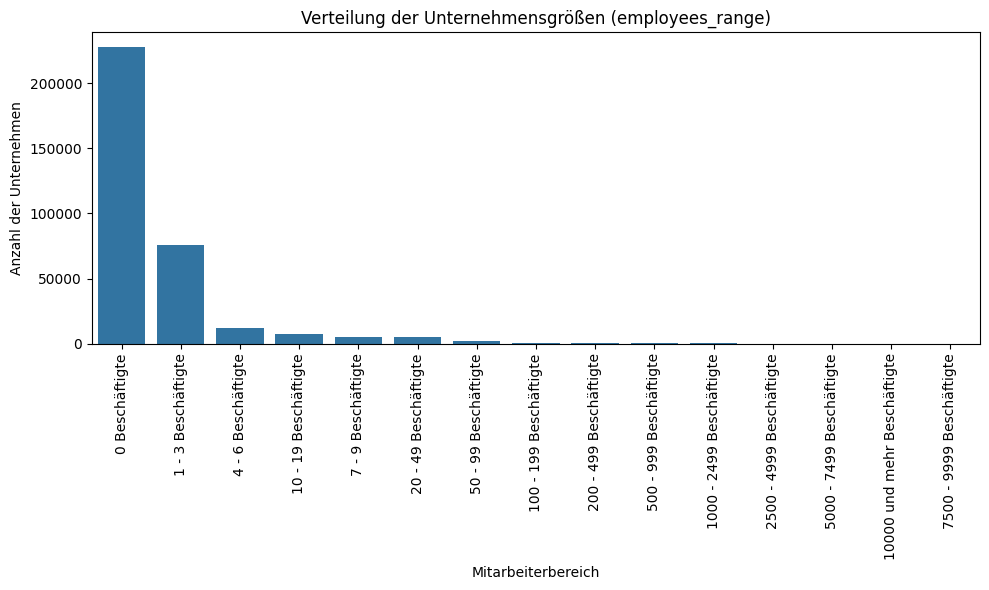

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["employees_range"].value_counts().index, y=df["employees_range"].value_counts().values)
plt.title("Verteilung der Unternehmensgr√∂√üen (employees_range)")
plt.xlabel("Mitarbeiterbereich")
plt.ylabel("Anzahl der Unternehmen")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Extrem unausgewogene Verteilung

68‚ÄØ% aller Eintr√§ge haben ‚Äû0 Besch√§ftigte‚Äú, nur wenige Tausend haben >50 Besch√§ftigte.
Die kleinen Gruppen sind massiv unterrepr√§sentiert ‚Üí Clusterung wird dominiert von Kleinstunternehmen.

## business_age

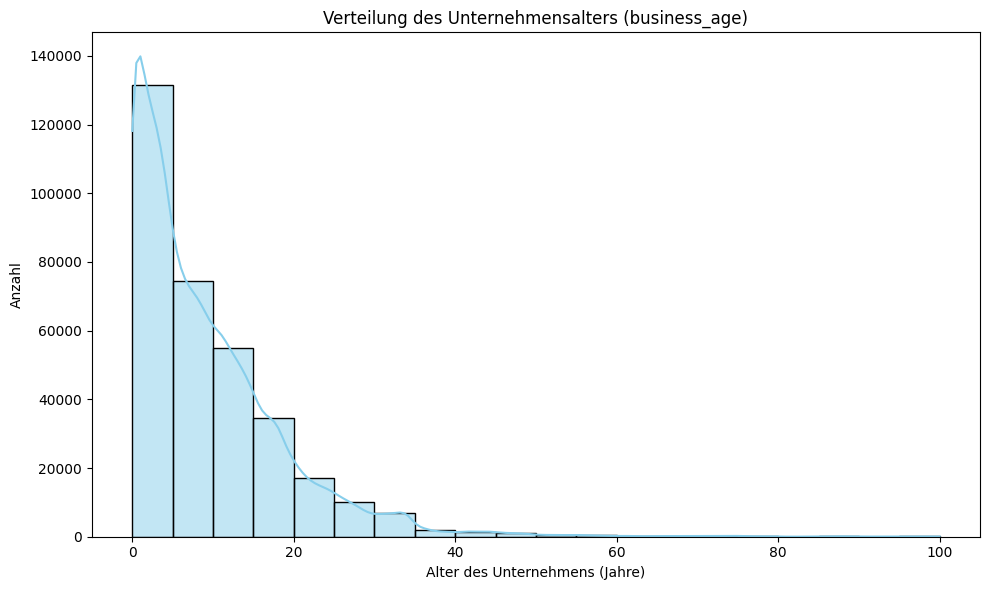

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['business_age'], bins=20, kde=True, color='skyblue')
plt.title("Verteilung des Unternehmensalters (business_age)")
plt.xlabel("Alter des Unternehmens (Jahre)")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

In [31]:
print(f"Unternehmen mit < 6 Jahren: {(df['business_age'] < 6).sum()}")
print(f"Unternehmen mit > 6 Jahren: {(df['business_age'] > 6).sum()}")

Unternehmen mit < 6 Jahren: 149048
Unternehmen mit > 6 Jahren: 171555


## Bezirke

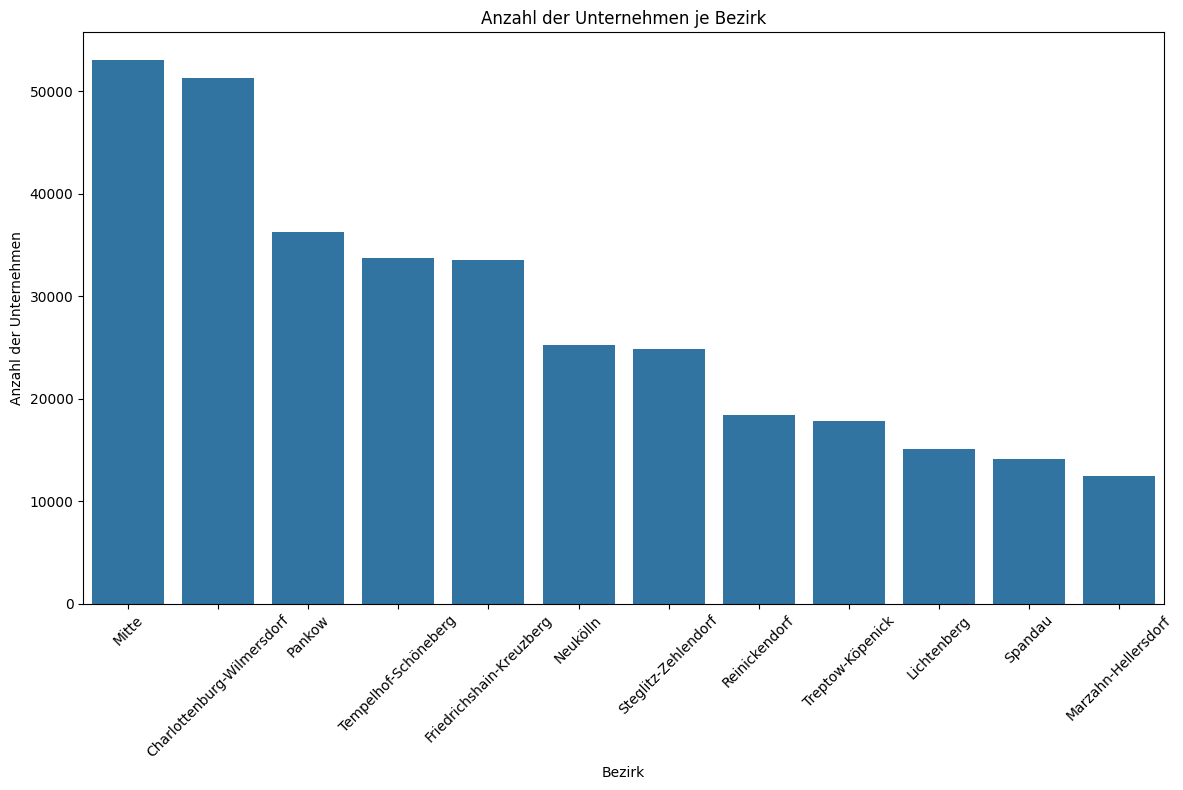

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Bezirk"].value_counts().index, y=df["Bezirk"].value_counts().values)
plt.title("Anzahl der Unternehmen je Bezirk")
plt.xlabel("Bezirk")
plt.ylabel("Anzahl der Unternehmen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## employees_numerical

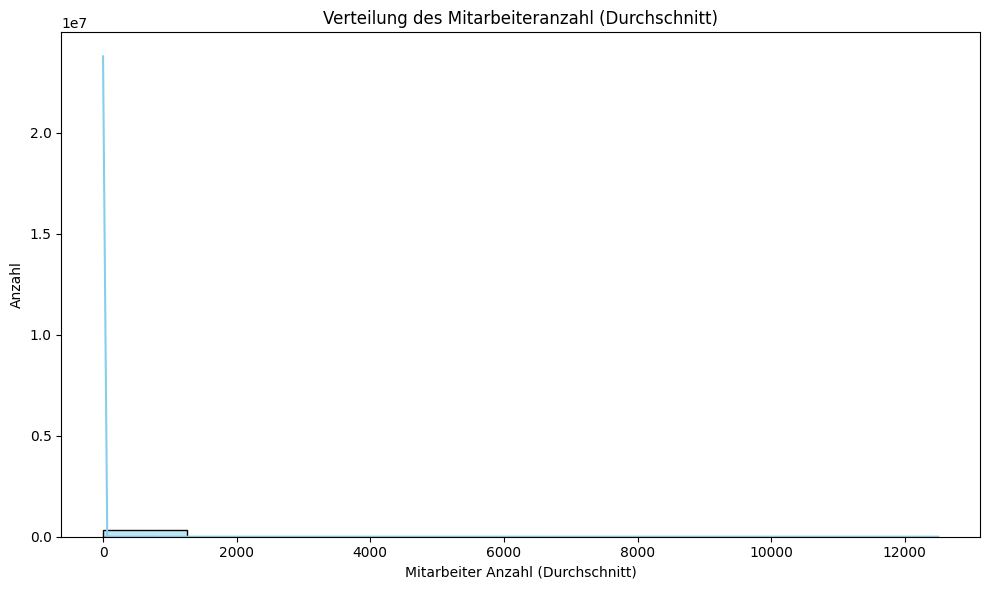

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['employees_numerical'], bins=10, kde=True, color='skyblue')
plt.title("Verteilung des Mitarbeiteranzahl (Durchschnitt)")
plt.xlabel("Mitarbeiter Anzahl (Durchschnitt)")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

Auch hier die Mitarbeiteranzahl sind zu stark gewichtet auf 0 - w√ºrde das Clustering benachteiligen

## gr√ºndungsjahr

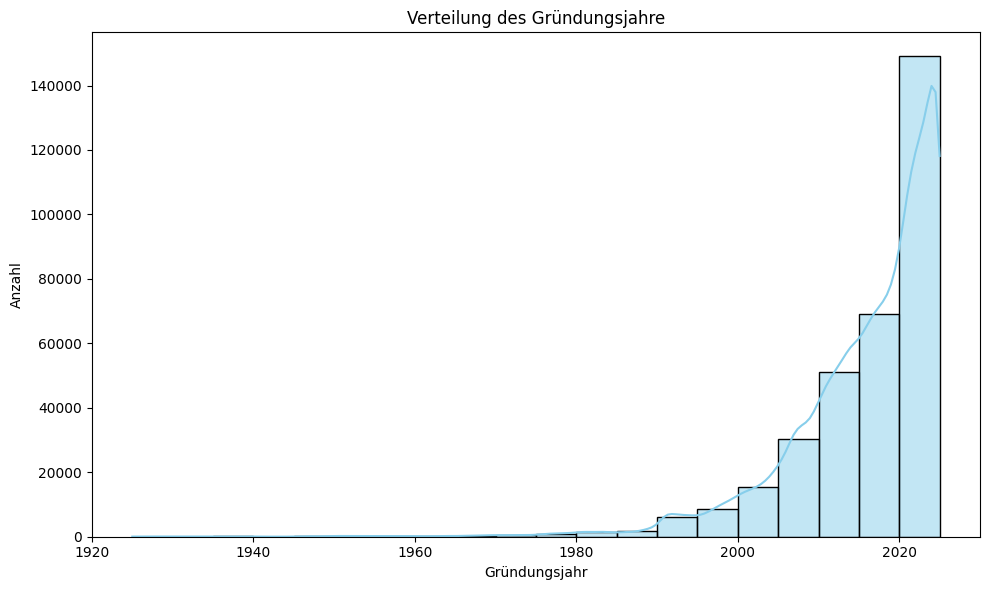

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['gr√ºndungsjahr'], bins=20, kde=True, color='skyblue')
plt.title("Verteilung des Gr√ºndungsjahre")
plt.xlabel("Gr√ºndungsjahr")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

## Bodenrichtwert

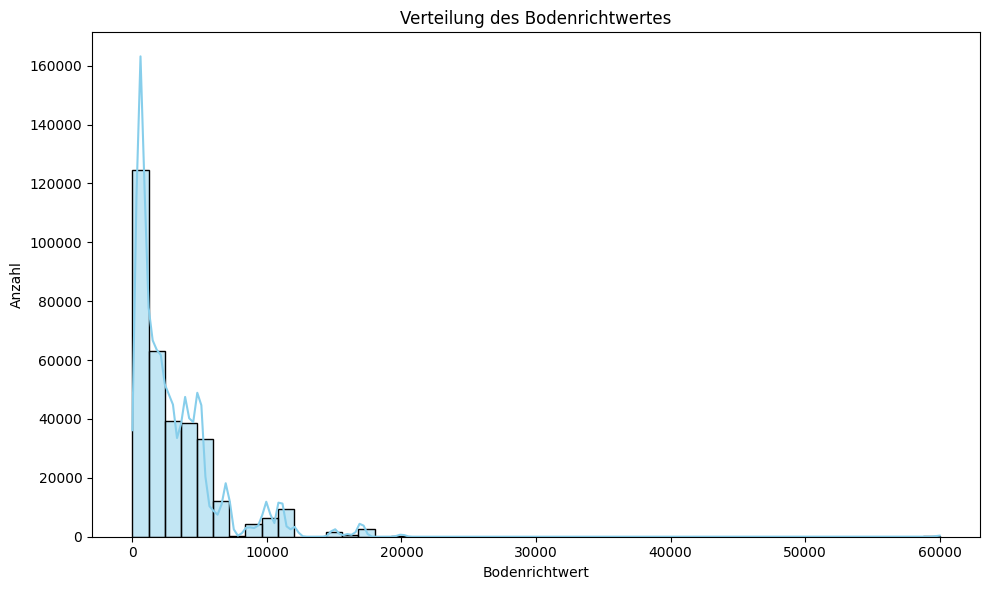

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Bodenrichtwert'], bins=50, kde=True, color='skyblue')
plt.title("Verteilung des Bodenrichtwertes")
plt.xlabel("Bodenrichtwert")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

In [49]:
df["Bodenrichtwert"].describe()

count    335962.000000
mean       3065.362017
std        3408.441098
min           0.600000
25%         700.000000
50%        2100.000000
75%        4500.000000
max       60000.000000
Name: Bodenrichtwert, dtype: float64

## ew2023

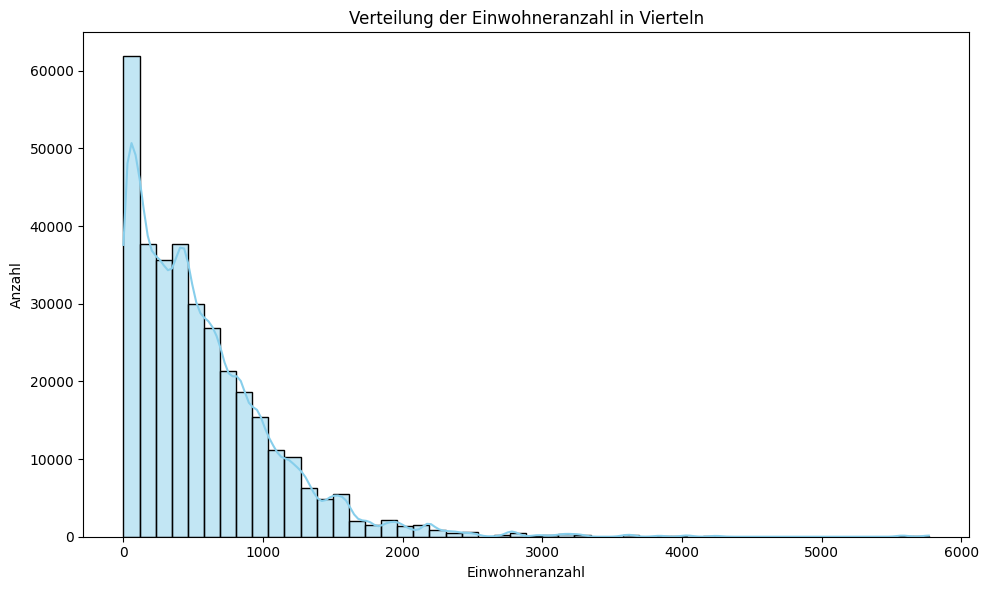

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ew2023'], bins=50, kde=True, color='skyblue')
plt.title("Verteilung der Einwohneranzahl in Vierteln")
plt.xlabel("Einwohneranzahl")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

In [55]:
df["ew2023"].describe()

count    335962.000000
mean        571.440267
std         534.135056
min           0.000000
25%         177.000000
50%         446.000000
75%         814.000000
max        5766.000000
Name: ew2023, dtype: float64

## ew_ha_2023

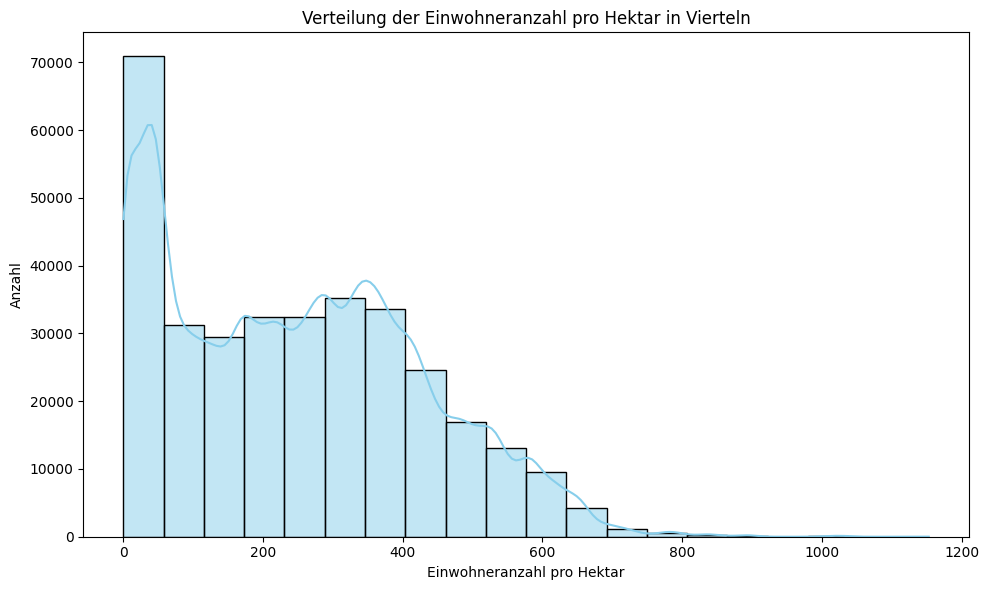

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ew_ha_2023'], bins=20, kde=True, color='skyblue')
plt.title("Verteilung der Einwohneranzahl pro Hektar in Vierteln")
plt.xlabel("Einwohneranzahl pro Hektar")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

In [57]:
df["ew_ha_2023"].describe()

count    335962.000000
mean        249.143146
std         181.164609
min           0.000000
25%          80.150000
50%         238.900000
75%         378.200000
max        1153.060000
Name: ew_ha_2023, dtype: float64

## typklar

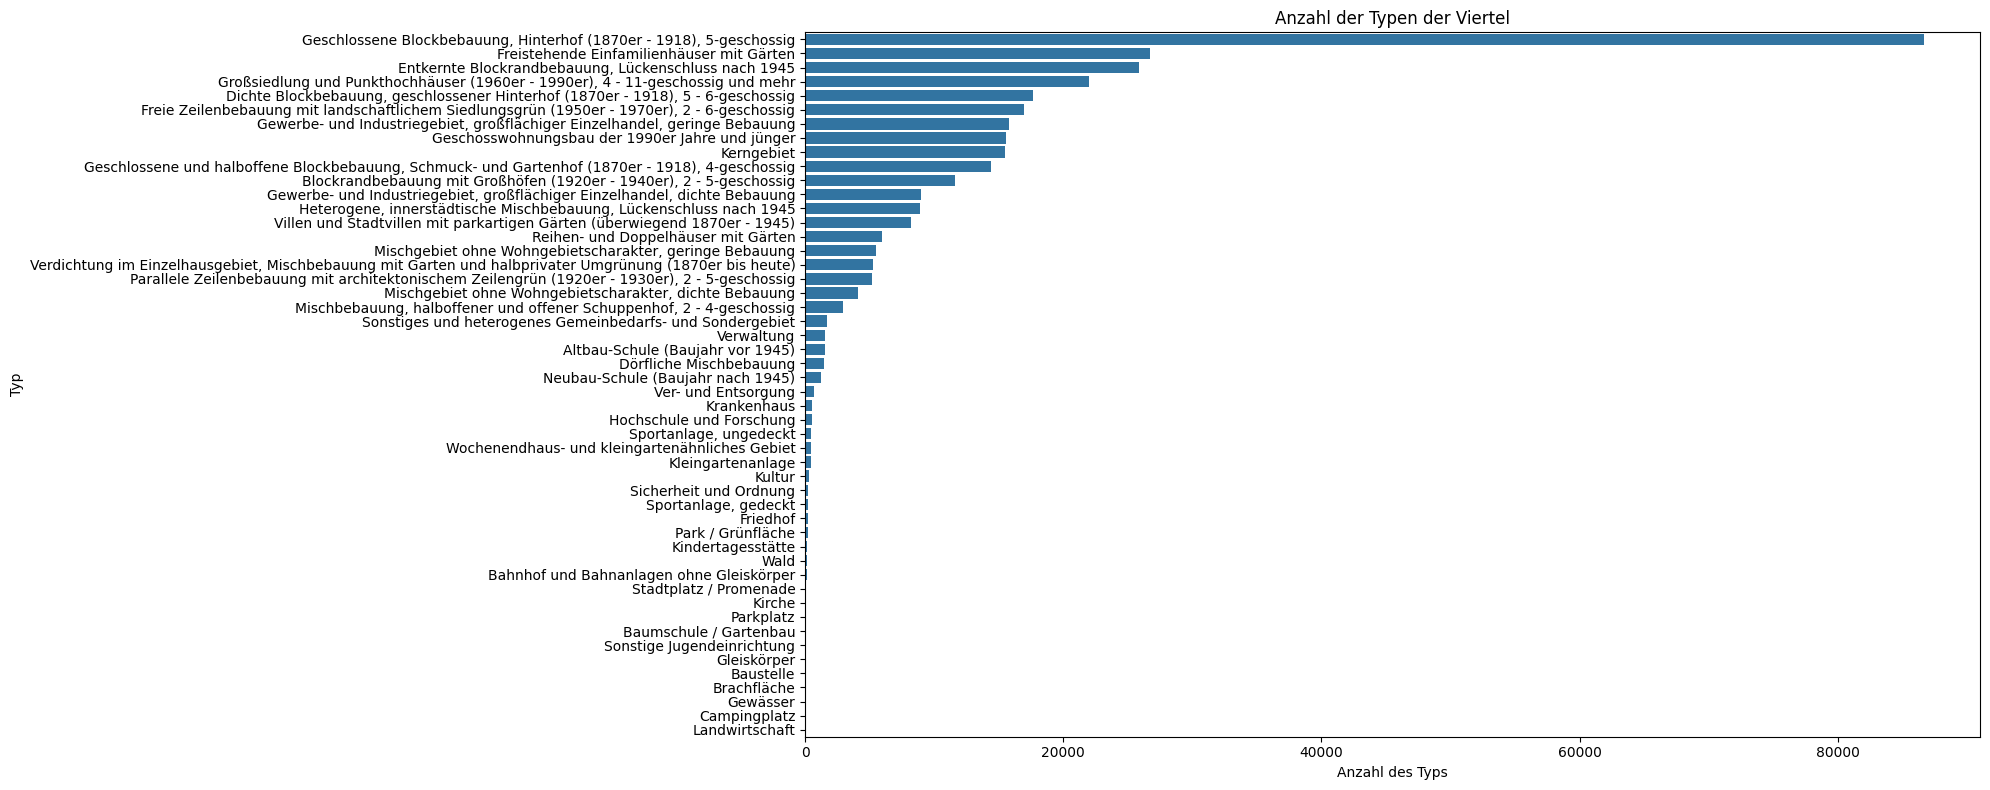

In [73]:
plt.figure(figsize=(20, 8))
sns.barplot(y=df["typklar"].value_counts().index, x=df["typklar"].value_counts().values)
plt.title("Anzahl der Typen der Viertel")
plt.ylabel("Typ")
plt.xlabel("Anzahl des Typs")
plt.tight_layout()
plt.show()

## Branche_grob

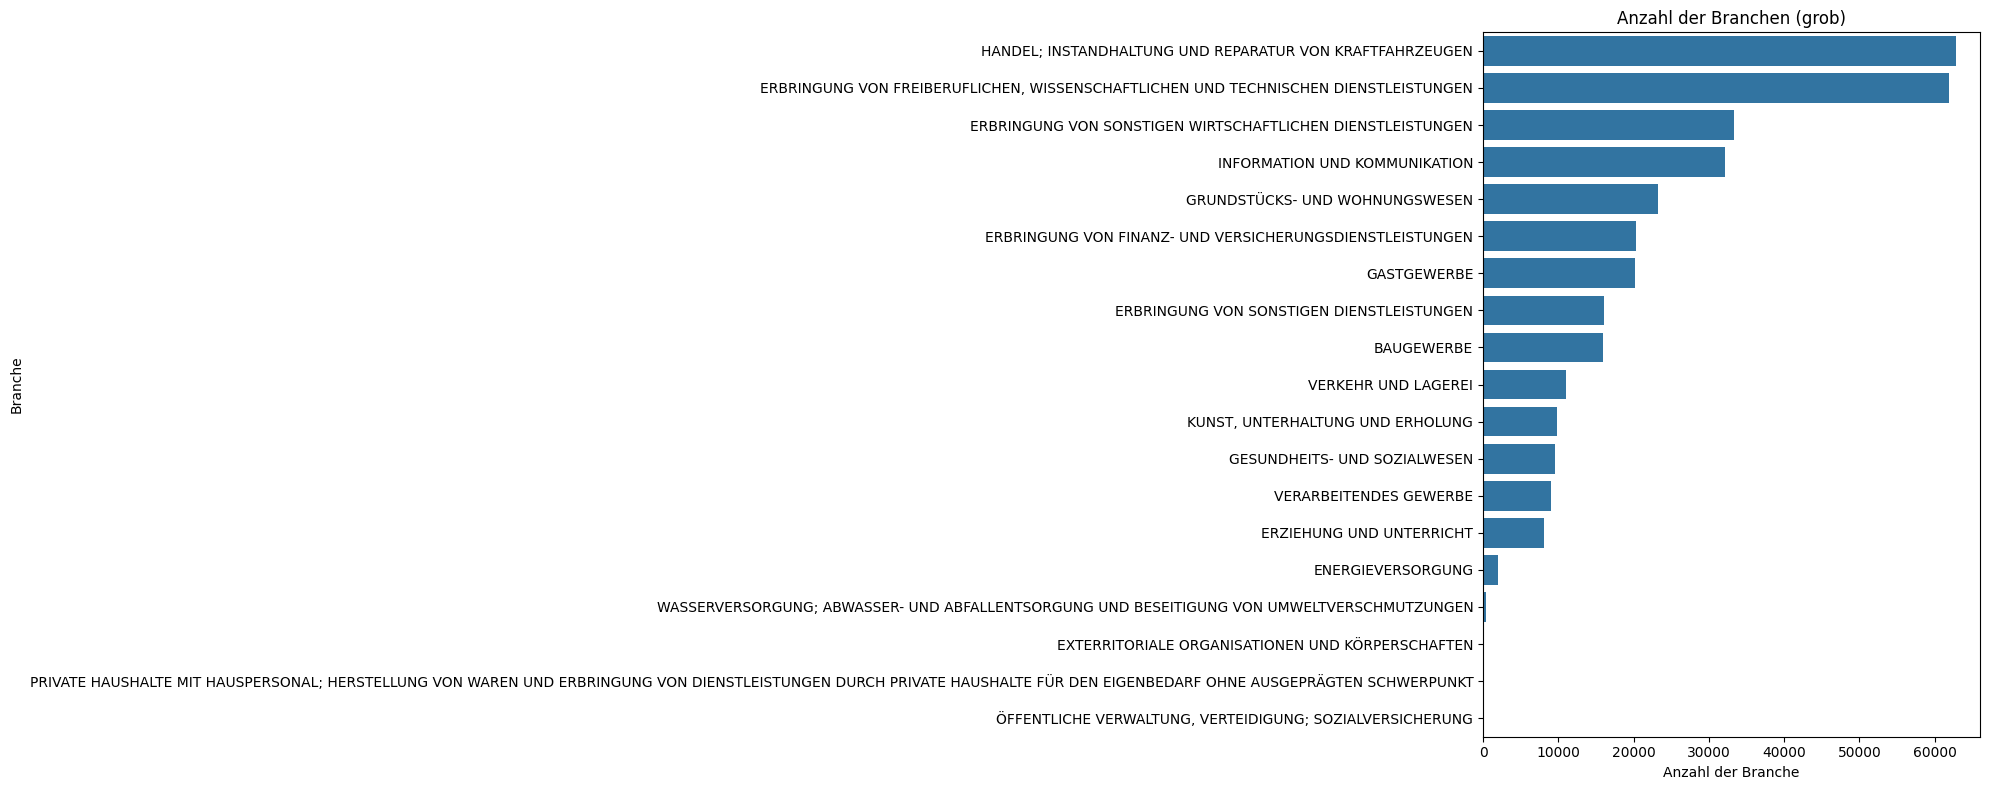

In [74]:
plt.figure(figsize=(20, 8))
sns.barplot(y=df["Branche_grob"].value_counts().index, x=df["Branche_grob"].value_counts().values)
plt.title("Anzahl der Branchen (grob)")
plt.ylabel("Branche")
plt.xlabel("Anzahl der Branche")
plt.tight_layout()
plt.show()

## Verteilung von business_age nach Bezirk und Branche_grob

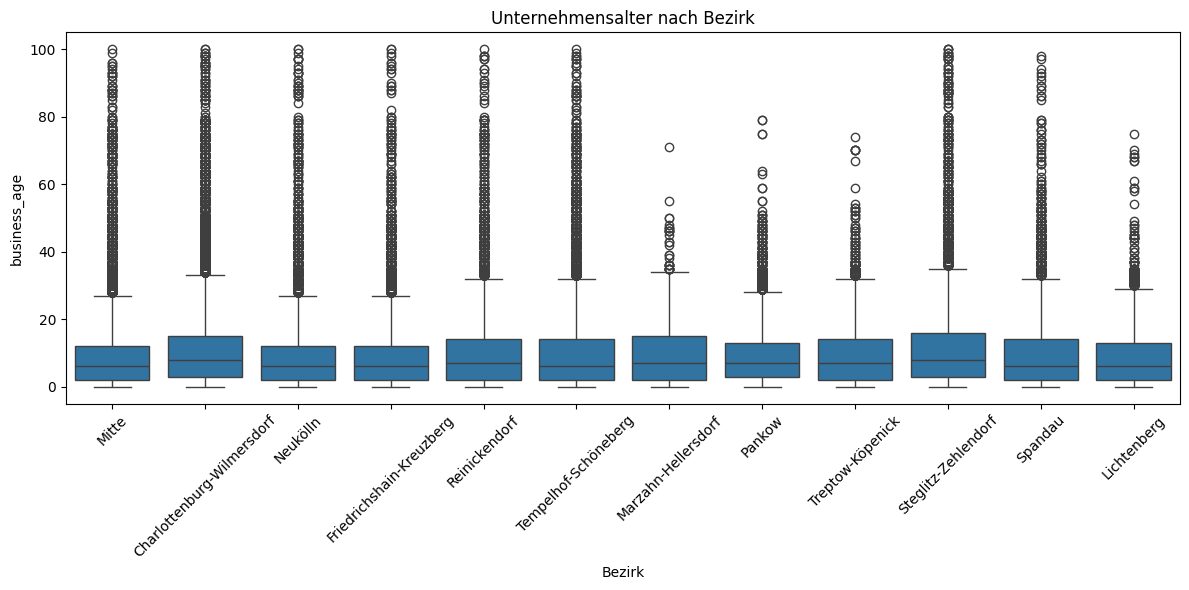

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Bezirk', y='business_age')
plt.xticks(rotation=45)
plt.title("Unternehmensalter nach Bezirk")
plt.tight_layout()
plt.show()

/var/folders/0c/r0htcd1j05v_lb53s4xtzbn80000gn/T/ipykernel_16344/82963100.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


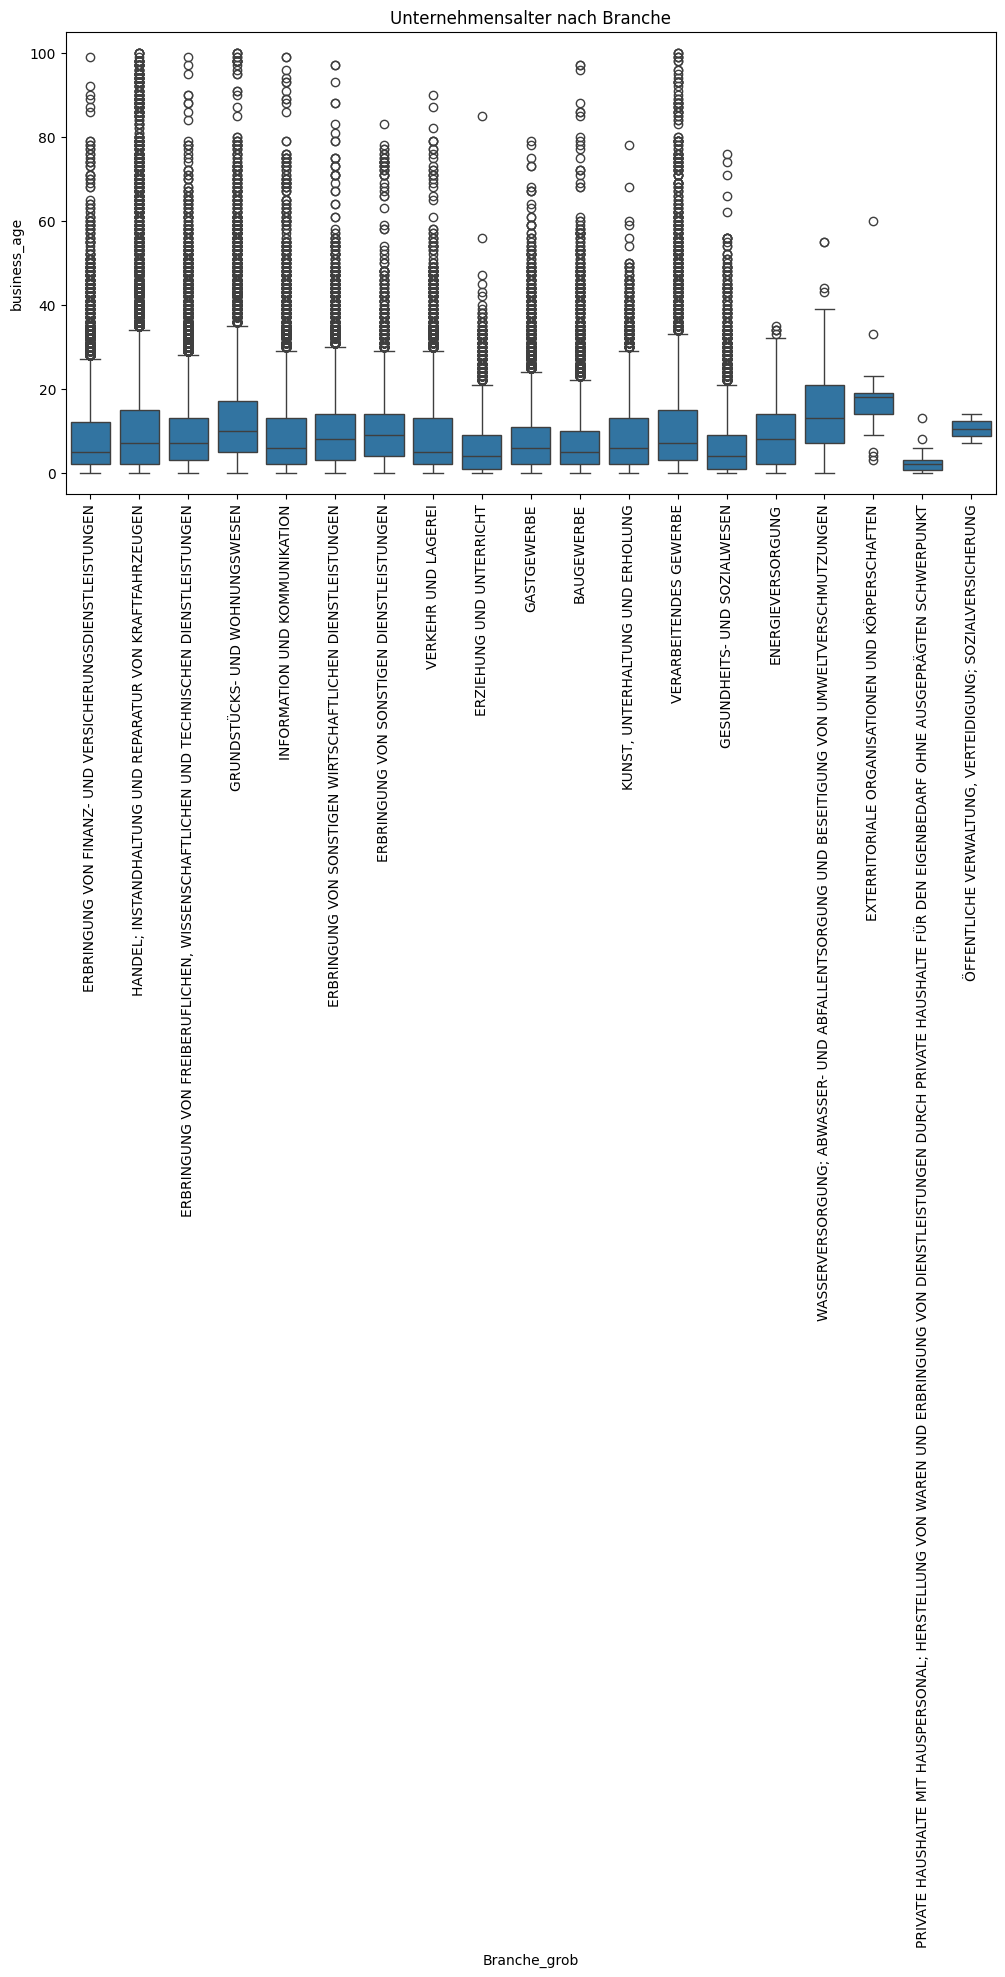

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Branche_grob', y='business_age')
plt.xticks(rotation=90)
plt.title("Unternehmensalter nach Branche")
plt.tight_layout()
plt.show()

## Beziehung: business_age vs. Bodenrichtwert, ew2023, ew_ha_2023

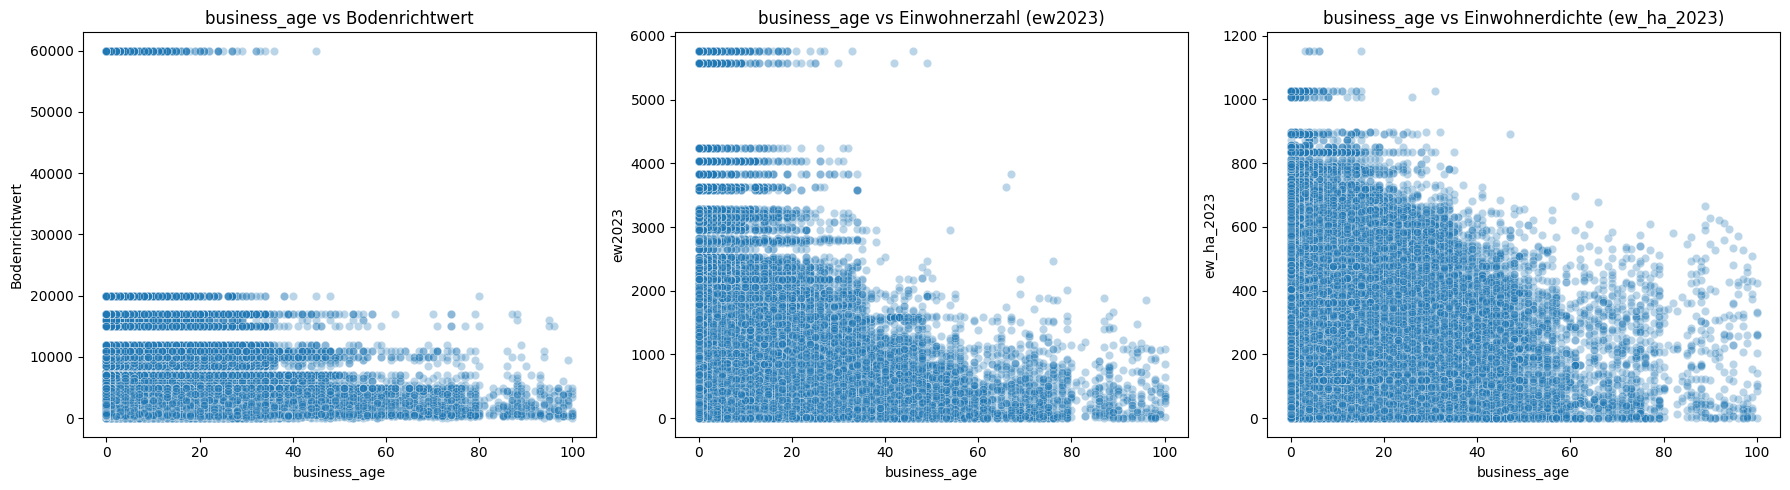

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='business_age', y='Bodenrichtwert', alpha=0.3, ax=axes[0])
axes[0].set_title("business_age vs Bodenrichtwert")

sns.scatterplot(data=df, x='business_age', y='ew2023', alpha=0.3, ax=axes[1])
axes[1].set_title("business_age vs Einwohnerzahl (ew2023)")

sns.scatterplot(data=df, x='business_age', y='ew_ha_2023', alpha=0.3, ax=axes[2])
axes[2].set_title("business_age vs Einwohnerdichte (ew_ha_2023)")

plt.tight_layout()
plt.show()

Vermutung = √§ltere Unternehmen sind dort wo weniger Menschen sind und der BRW gering ist --> Wahrscheinlich mehr MA und brauchen mehr Platz (Grengebiete in Berlin)

## Heatmap: Mittelwerte gruppiert nach Bezirk und Branche_grob

/var/folders/0c/r0htcd1j05v_lb53s4xtzbn80000gn/T/ipykernel_16344/139937374.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


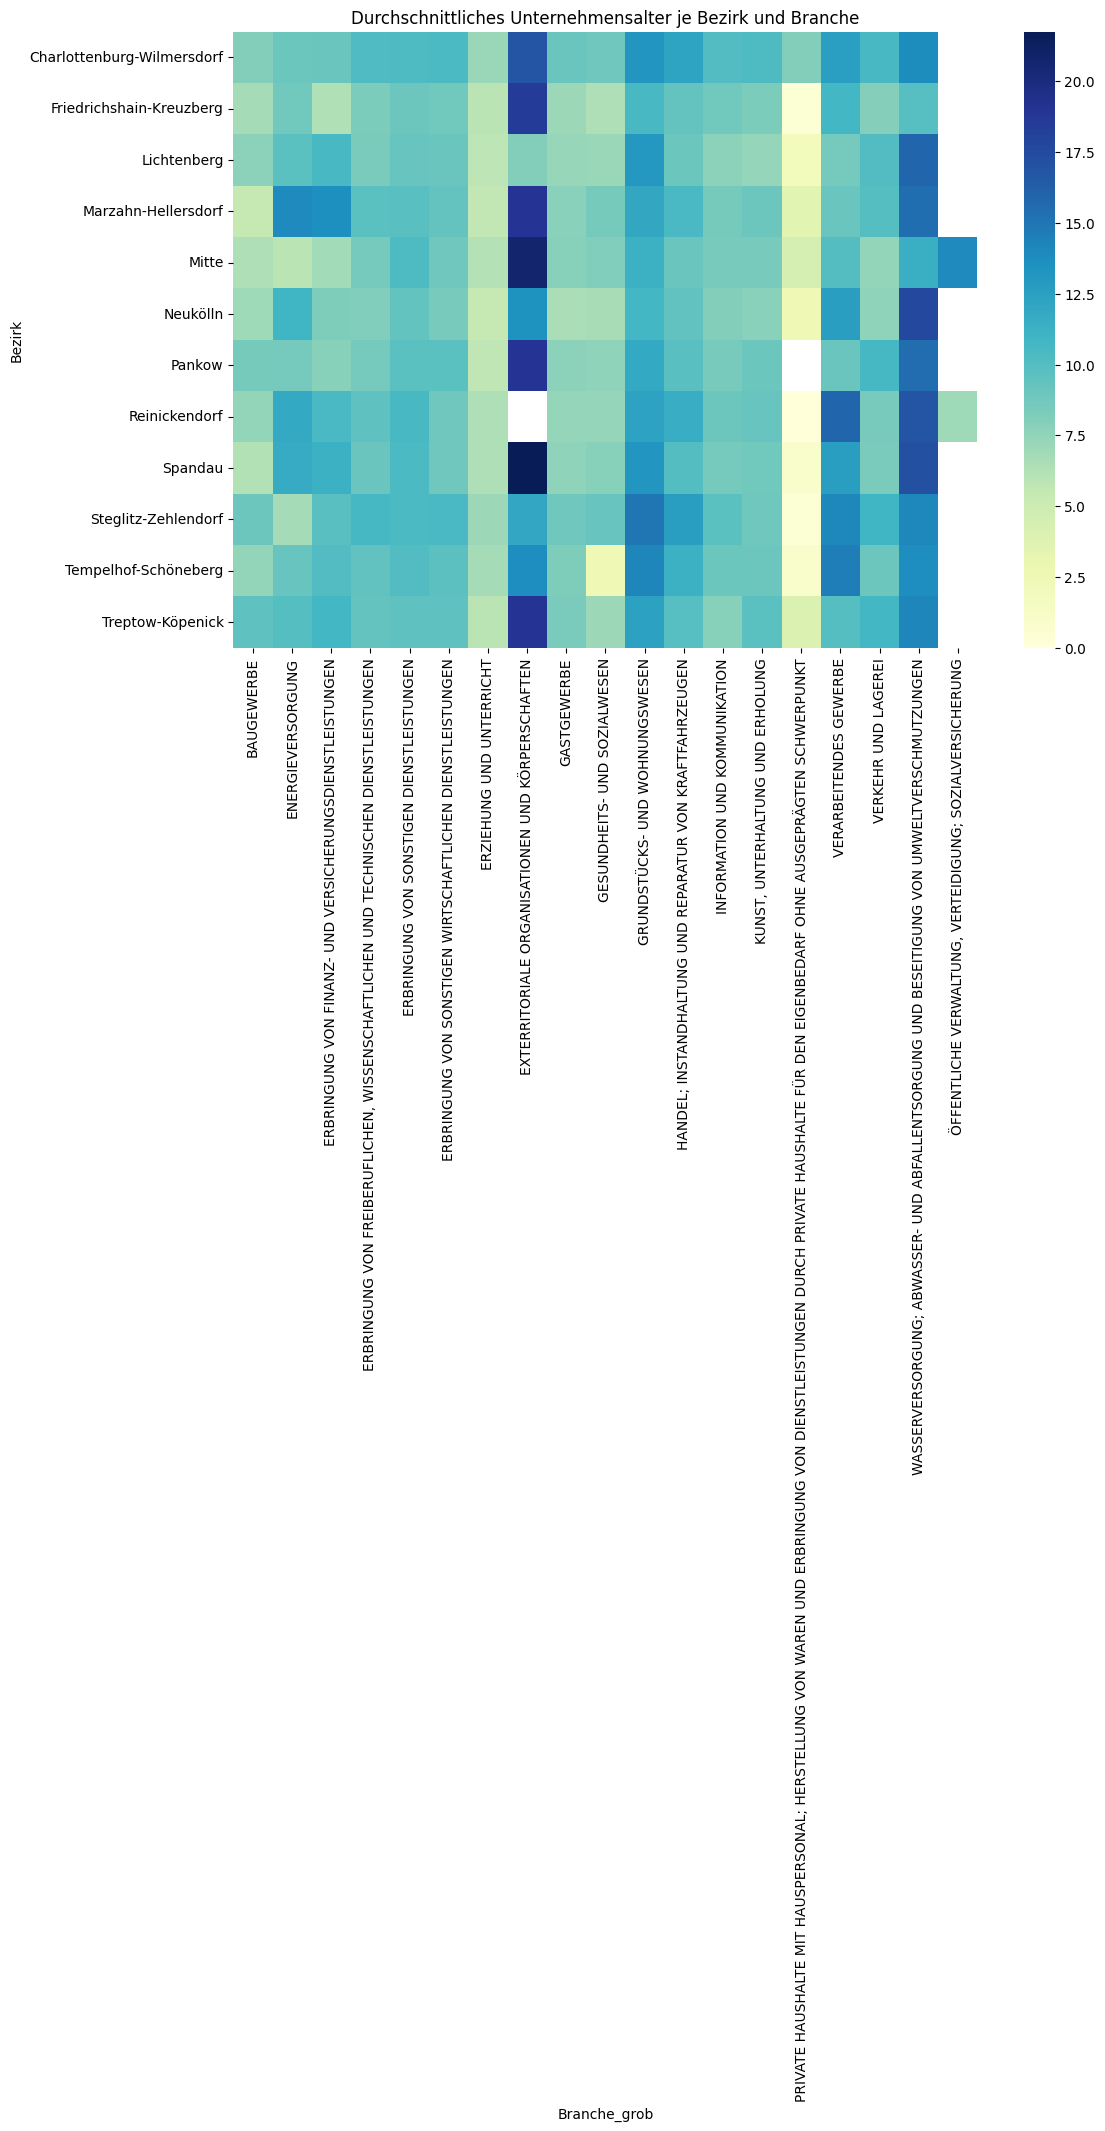

In [79]:
pivot = df.pivot_table(index='Bezirk', columns='Branche_grob', values='business_age', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=False, cmap='YlGnBu')
plt.title("Durchschnittliches Unternehmensalter je Bezirk und Branche")
plt.tight_layout()
plt.show()

## Pairplot (nur numerische Spalten)

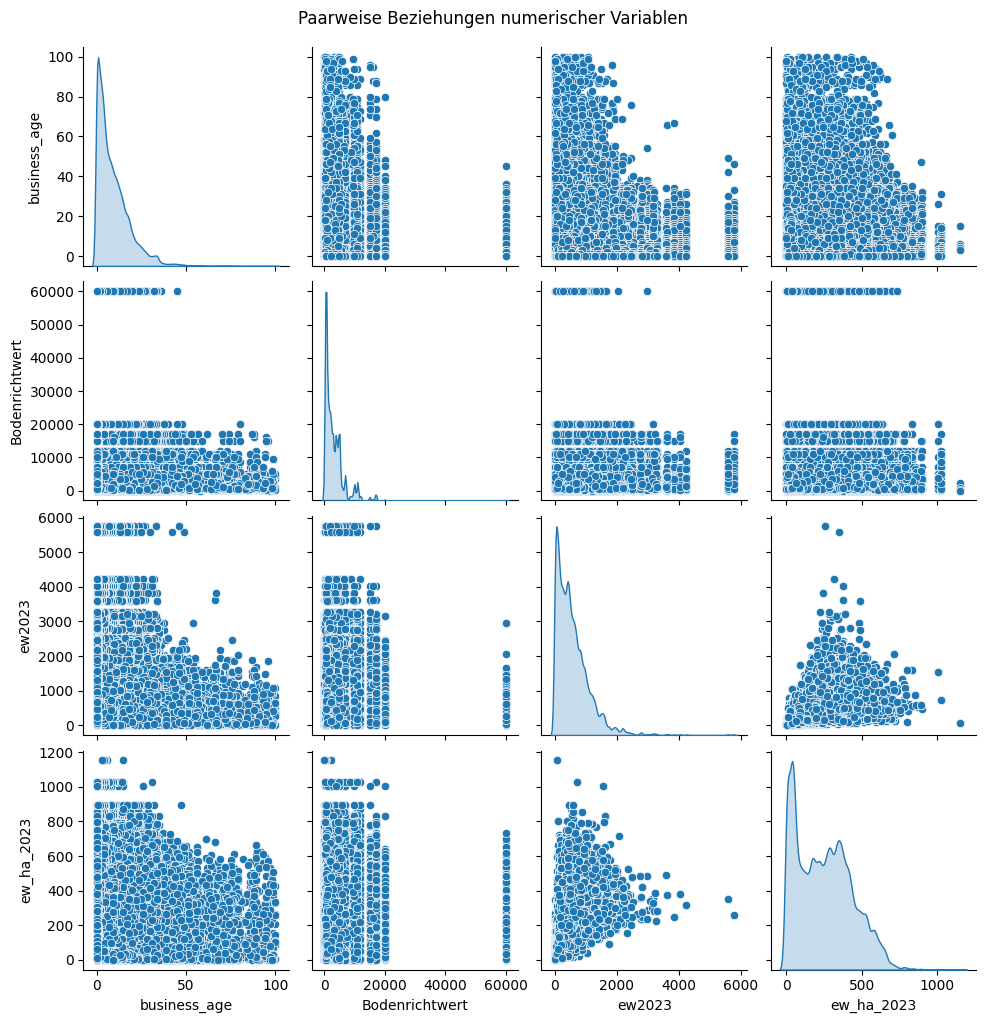

In [80]:
sns.pairplot(df[['business_age', 'Bodenrichtwert', 'ew2023', 'ew_ha_2023']], diag_kind='kde')
plt.suptitle("Paarweise Beziehungen numerischer Variablen", y=1.02)
plt.show()

## Korrelationstabelle der numerischen Werte

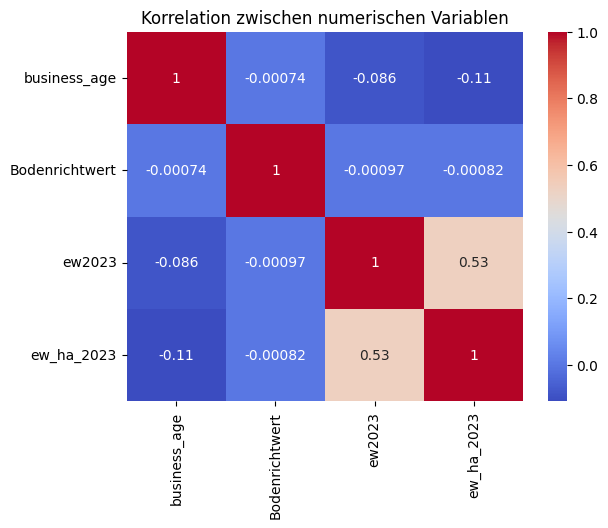

In [81]:
corr = df[['business_age', 'Bodenrichtwert', 'ew2023', 'ew_ha_2023']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korrelation zwischen numerischen Variablen")
plt.show()